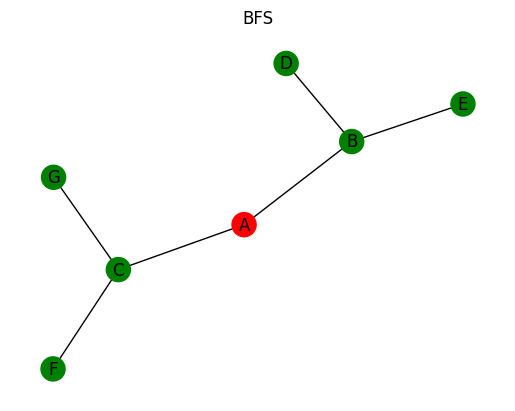

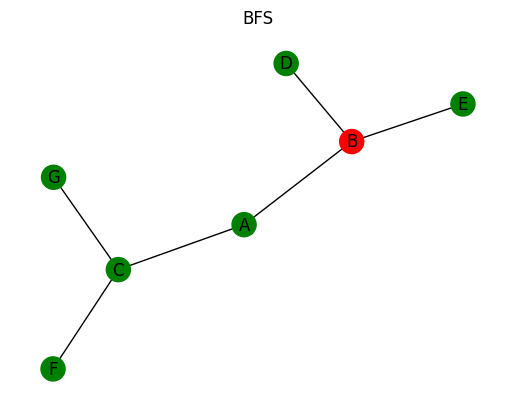

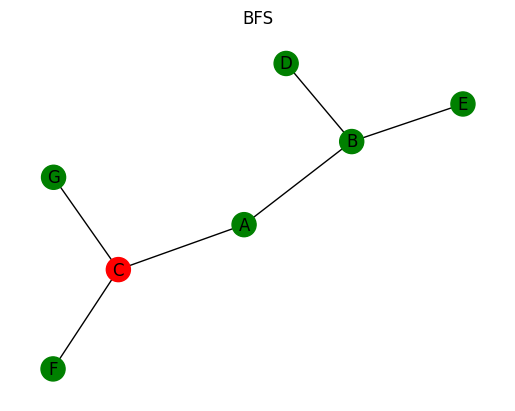

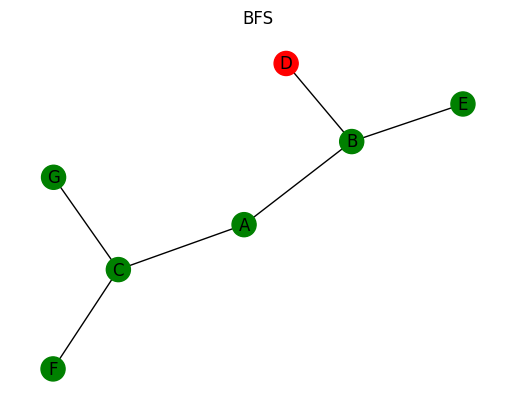

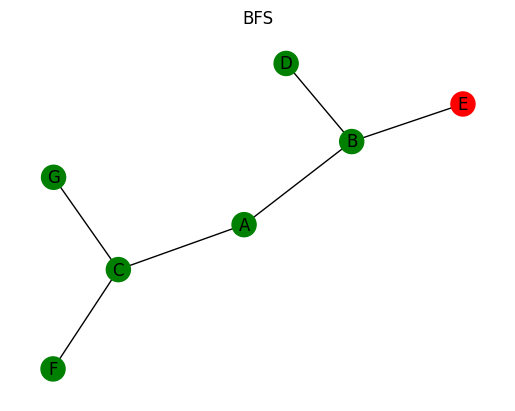

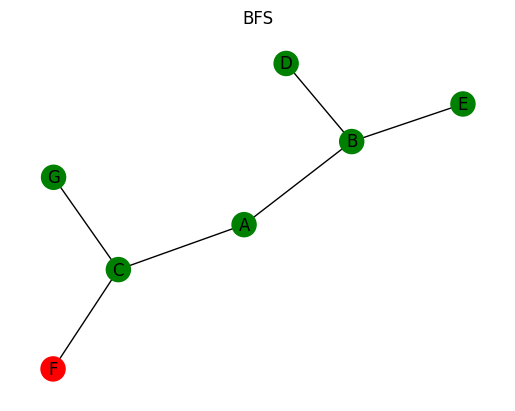

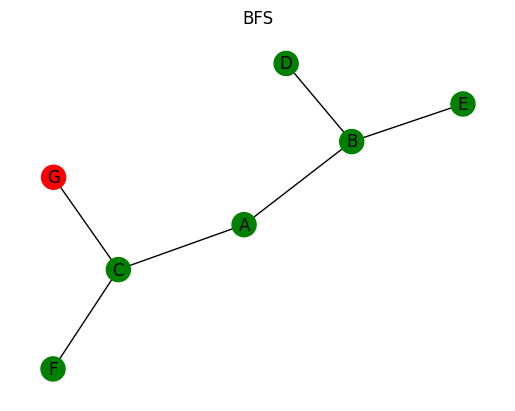

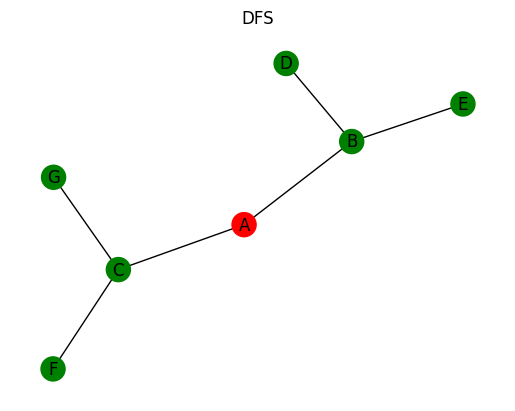

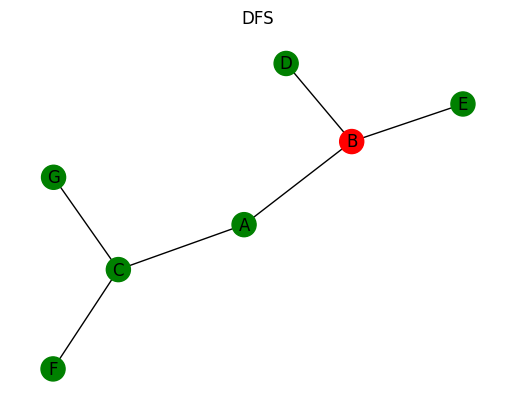

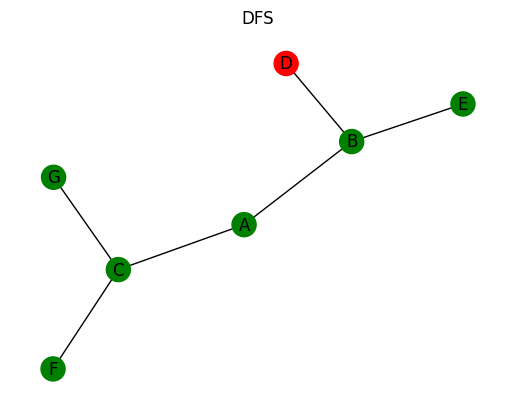

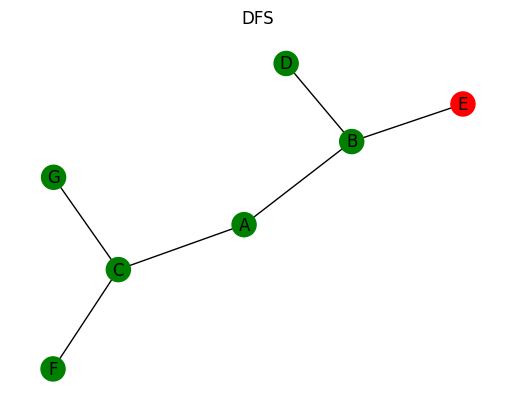

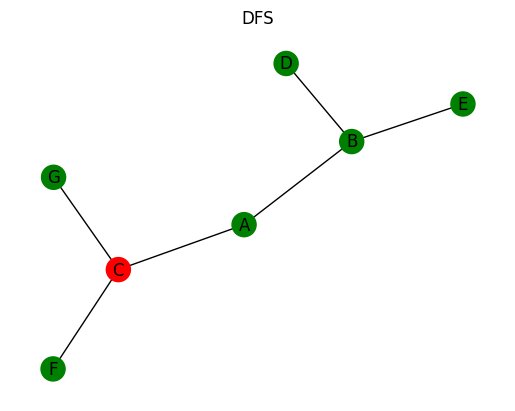

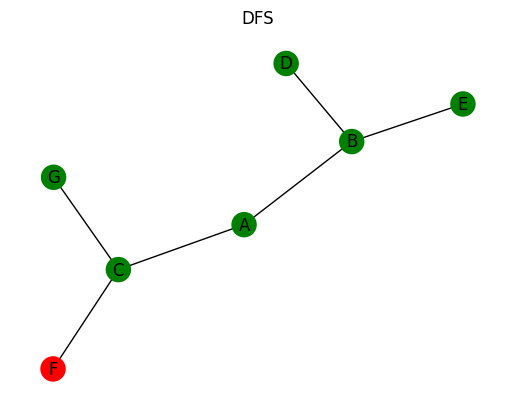

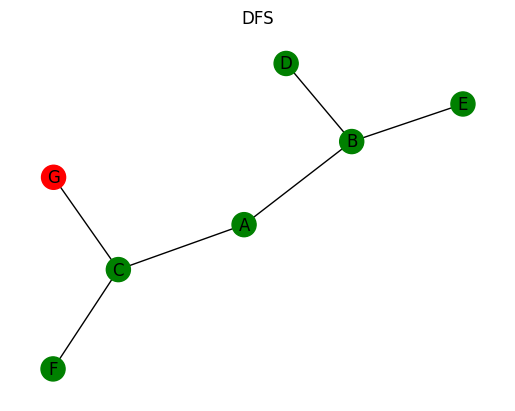

In [1]:
import queue
import networkx as nx
import matplotlib.pyplot as plt
import time

def order_bfs(graph, start_node):
    visited = set()
    q = queue.Queue()
    q.put(start_node)
    order = []
    
    while not q.empty():
        vertex = q.get()
        if vertex not in visited:
            order.append(vertex)
            visited.add(vertex)
            for node in graph.neighbors(vertex): 
                if node not in visited:
                    q.put(node)

    return order

def order_dfs(graph, start_node, visited=None, order=None):
    if visited is None:
        visited = set()
        order = [] 
    
    if start_node not in visited:
        order.append(start_node)
        visited.add(start_node)
        for node in graph.neighbors(start_node): 
            if node not in visited:
                order_dfs(graph, node, visited, order)

    return order

def visualize_search(order, title, G, pos):
    plt.figure()
    plt.title(title)
    for i, node in enumerate(order, start=1):
        plt.clf()
        plt.title(title)
        nx.draw(G, pos, with_labels=True, node_color=['r' if n == node else 'g' for n in G.nodes])
        plt.draw()
        plt.pause(0.5)
    plt.show()
    time.sleep(0.5)


G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])
pos = nx.spring_layout(G)

visualize_search(order_bfs(G, 'A'), 'BFS', G, pos)
visualize_search(order_dfs(G, 'A'), 'DFS', G, pos)
